In [1]:
import re
import pandas as pd

In [2]:
f=open('E:\DataSets\chats\WhatsApp Chat with Kahin chalo......txt',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
# print(data)

In [5]:
pattern ='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages=re.split(pattern,data)[1:]

In [7]:
# print(messages)

In [8]:
dates=re.findall(pattern,data)
dates

['11/06/2022, 20:36 - ',
 '11/06/2022, 20:36 - ',
 '11/06/2022, 20:36 - ',
 '11/06/2022, 20:36 - ',
 '11/06/2022, 20:36 - ',
 '11/06/2022, 20:36 - ',
 '11/06/2022, 20:50 - ',
 '11/06/2022, 20:52 - ',
 '11/06/2022, 20:52 - ',
 '11/06/2022, 20:54 - ',
 '11/06/2022, 20:56 - ',
 '11/06/2022, 20:58 - ',
 '11/06/2022, 20:58 - ',
 '11/06/2022, 21:35 - ',
 '11/06/2022, 21:35 - ',
 '11/06/2022, 21:36 - ',
 '11/06/2022, 21:36 - ',
 '11/06/2022, 21:37 - ',
 '11/06/2022, 21:37 - ',
 '11/06/2022, 21:49 - ',
 '11/06/2022, 21:49 - ',
 '11/06/2022, 21:51 - ',
 '11/06/2022, 21:51 - ',
 '11/06/2022, 21:52 - ',
 '11/06/2022, 21:52 - ',
 '11/06/2022, 21:52 - ',
 '11/06/2022, 21:52 - ',
 '11/06/2022, 21:52 - ',
 '11/06/2022, 21:52 - ',
 '11/06/2022, 21:52 - ',
 '11/06/2022, 21:52 - ',
 '11/06/2022, 21:52 - ',
 '11/06/2022, 21:53 - ',
 '11/06/2022, 21:53 - ',
 '11/06/2022, 21:53 - ',
 '11/06/2022, 21:53 - ',
 '11/06/2022, 21:53 - ',
 '11/06/2022, 22:17 - ',
 '11/06/2022, 22:18 - ',
 '11/06/2022, 22:19 - ',


In [9]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})

In [10]:
#change format of date and time
df['message_date']=pd.to_datetime(df['message_date'],format='%d/%m/%Y, %H:%M - ')
df.rename(columns={'message_date':'date'},inplace=True)

In [11]:
df.head()

user_message                date
0  Messages and calls are end-to-end encrypted. N... 2022-06-11 20:36:00
1        Bhavya Aggarwal created group "Way to cp"\n 2022-06-11 20:36:00
2                        Bhavya Aggarwal added you\n 2022-06-11 20:36:00
3                Bhavya Aggarwal added Yogesh Gaur\n 2022-06-11 20:36:00
4                Bhavya Aggarwal added Prateek Kec\n 2022-06-11 20:36:00

In [12]:
df.shape

(7983, 2)

In [13]:
#seperate user and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:#user name
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)

In [14]:
df.head()

date                user  \
0 2022-06-11 20:36:00  group_notification   
1 2022-06-11 20:36:00  group_notification   
2 2022-06-11 20:36:00  group_notification   
3 2022-06-11 20:36:00  group_notification   
4 2022-06-11 20:36:00  group_notification   

                                             message  
0  Messages and calls are end-to-end encrypted. N...  
1        Bhavya Aggarwal created group "Way to cp"\n  
2                        Bhavya Aggarwal added you\n  
3                Bhavya Aggarwal added Yogesh Gaur\n  
4                Bhavya Aggarwal added Prateek Kec\n

In [15]:
df['date'].dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
7978    2023
7979    2023
7980    2023
7981    2023
7982    2023
Name: date, Length: 7983, dtype: int64

In [16]:
#creating year column
df['year']=df['date'].dt.year

In [17]:
#creating month name column
df['month']=df['date'].dt.month_name()

In [18]:
#creating day column
df['day']=df['date'].dt.day

In [19]:
#creating hour and minute column
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute

In [20]:
df.head()

date                user  \
0 2022-06-11 20:36:00  group_notification   
1 2022-06-11 20:36:00  group_notification   
2 2022-06-11 20:36:00  group_notification   
3 2022-06-11 20:36:00  group_notification   
4 2022-06-11 20:36:00  group_notification   

                                             message  year month  day  hour  \
0  Messages and calls are end-to-end encrypted. N...  2022  June   11    20   
1        Bhavya Aggarwal created group "Way to cp"\n  2022  June   11    20   
2                        Bhavya Aggarwal added you\n  2022  June   11    20   
3                Bhavya Aggarwal added Yogesh Gaur\n  2022  June   11    20   
4                Bhavya Aggarwal added Prateek Kec\n  2022  June   11    20   

   minute  
0      36  
1      36  
2      36  
3      36  
4      36

In [21]:
df['date'].dt.day_name()

0       Saturday
1       Saturday
2       Saturday
3       Saturday
4       Saturday
          ...   
7978      Monday
7979      Monday
7980      Monday
7981      Monday
7982      Monday
Name: date, Length: 7983, dtype: object

In [22]:
df[df['user']=='Bhavya Aggarwal'].shape[0]

1889

In [23]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [24]:
len(words)

38026

In [25]:
df[df['message']=='<Media omitted>\n']

date             user            message  year month  day  \
41   2022-06-11 22:19:00  Bhavya Aggarwal  <Media omitted>\n  2022  June   11   
56   2022-06-12 08:36:00      Yogesh Gaur  <Media omitted>\n  2022  June   12   
57   2022-06-12 08:36:00      Yogesh Gaur  <Media omitted>\n  2022  June   12   
58   2022-06-12 08:36:00      Yogesh Gaur  <Media omitted>\n  2022  June   12   
78   2022-06-12 11:19:00      Yogesh Gaur  <Media omitted>\n  2022  June   12   
...                  ...              ...                ...   ...   ...  ...   
7935 2023-05-20 12:08:00  Bhavya Aggarwal  <Media omitted>\n  2023   May   20   
7955 2023-05-20 20:59:00       Ritik jain  <Media omitted>\n  2023   May   20   
7961 2023-05-21 21:11:00  Bhavya Aggarwal  <Media omitted>\n  2023   May   21   
7962 2023-05-21 21:11:00  Bhavya Aggarwal  <Media omitted>\n  2023   May   21   
7963 2023-05-21 22:34:00      Prateek Kec  <Media omitted>\n  2023   May   21   

      hour  minute  
41      22      19  
56       8      36  
57       8      36  
58       8      36  
78      11      19  
...    ...     ...  
7935    12       8  
7955    20      59  
7961    21      11  
7962    21      11  
7963    22      34  

[851 rows x 8 columns]

In [26]:
# !pip install urlextract

In [27]:
from urlextract import URLExtract

extractor=URLExtract()
urls=extractor.find_urls('fjdsnkf https://youtube.com, ftp://url.in')
urls

['https://youtube.com', 'ftp://url.in']

In [28]:
urls=[]
for message in df['message']:
    urls.extend(extractor.find_urls(message))
len(urls)

248

In [29]:
urls

['https://youtu.be/Po361hzJ1-0',
 'https://www.viki.com/tv/20218c-good-doctor#episodes',
 'https://youtu.be/ardtvdR28SQ',
 'https://play.google.com/store/apps/details?id=com.appon.carrom',
 'https://youtube.com/shorts/HL4MfFcT7uA?feature=share',
 'https://youtube.com/shorts/ZA2s8orARKM?feature=share',
 'https://youtube.com/shorts/SPMAKS2aOeY?feature=share',
 'https://erp.aktu.ac.in/WebPages/Public/Students/Reports/rptPrintStudentPDC.aspx',
 'https://codebreak60.com/',
 'https://www.myyellowplate.com/10-must-eat-places-kamla-nagar/',
 'https://www.upto75.com/codebreak-60-escape-game-room-kamla-nagar-delhi-discount-offers#:~:text=Escape%20Room%20Game%20ticket%20Price,Centre%20in%20Kamla%20Nagar%2C%20Delhi.',
 'https://watchasian.pe/drama-detail/money-heist',
 'https://youtu.be/pBO9JLe3iV8',
 'https://youtube.com/shorts/5nsYw3stW3o?feature=share',
 'https://youtube.com/shorts/rjRDEWqTv4c?feature=share',
 'https://youtube.com/shorts/yFfiwHZRE_w?feature=share',
 'https://youtube.com/shorts/

In [36]:
x=df['user'].value_counts().head()

In [35]:
import matplotlib.pyplot as plt

In [37]:
name=x.index
count=x.values

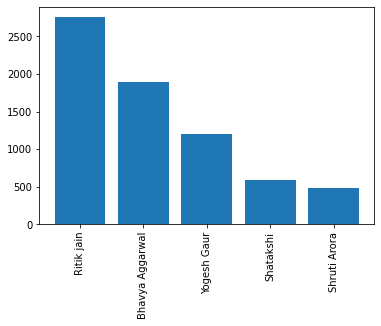

In [39]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [43]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

name  percent
0           Ritik jain    34.50
1      Bhavya Aggarwal    23.66
2          Yogesh Gaur    15.12
3            Shatakshi     7.34
4         Shruti Arora     6.09
5          Prateek Kec     5.54
6      +91 70110 06503     3.22
7      +91 78382 55878     2.69
8       Vidushi Sharma     0.79
9   group_notification     0.79
10      Ajab Singh Kec     0.26

In [56]:
#removing media
nm_df=df[df['message']!='<Media omitted>\n']
#removing group notfication
temp_df=nm_df[nm_df['user']!='group_notification']

In [67]:
#remoing stop words
f=open('E:\DataSets\stop_hinglish.txt','r')
stop_words=f.read().split('\n')
print(stop_words)

['.', '..', '...', '?', '-', '--', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', 'a', 'aadi', 'aaj', 'aap', 'aapne', 'aata', 'aati', 'aaya', 'aaye', 'ab', 'abbe', 'abbey', 'abe', 'abhi', 'able', 'about', 'above', 'accha', 'according', 'accordingly', 'acha', 'achcha', 'across', 'actually', 'after', 'afterwards', 'again', 'against', 'agar', 'ain', 'aint', "ain't", 'aisa', 'aise', 'aisi', 'alag', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'andar', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'ap', 'apan', 'apart', 'apna', 'apnaa', 'apne', 'apni', 'appear', 'are', 'aren', 'arent', "aren't", 'around', 'arre', 'as', 'aside', 'ask', 'asking', 'at', 'aur', 'avum', 'aya', 'aye', 'baad', 'baar', 'bad', 'bahut', 'bana', 'banae', 'banai', 'banao', 'banaya', 'banaye', 'banayi', 'banda', 'bande', 'bandi', 'bane', 'bani', 'bas', 'bata', 'batao', 'bc', 'be', '

In [57]:
nm_df.shape

(7132, 8)

In [58]:
temp_df.shape

(7069, 8)

In [79]:
#most used words
words=[]
for message in temp_df['message']:
#     for word in message.lower().split():
#         if word not in stop_words:
#             words.append(word)
    words.extend(message.split())

In [80]:
words

['‡§â‡§∏',
 'grp',
 '‡§™‡§∞',
 '‡§ï‡•ã‡§à',
 'message',
 '‡§Æ‡§§',
 '‡§ï‡§∞‡§®‡§æ',
 'Kal',
 '10:20',
 'pr',
 'wsm',
 'aa',
 'jana',
 'vha',
 'se',
 'shipra',
 'chalenge',
 'Joh',
 'direct',
 'shipra',
 'phauch',
 'rha',
 'hai',
 'voh',
 'abhi',
 'bta',
 'doh',
 '‡§Æ‡•à‡§Ç',
 'direct',
 'shipra',
 '‡§™‡§π‡•Å‡§Ç‡§ö',
 '‡§ú‡§æ‡§ä‡§Ç‡§ó‡§æ',
 'Ok',
 'Kal',
 '10:20',
 'pr',
 'wsm',
 'aa',
 'jana',
 'vha',
 'se',
 'shipra',
 'chalenge',
 'Joh',
 'direct',
 'shipra',
 'phauch',
 'rha',
 'hai',
 'voh',
 'abhi',
 'bta',
 'doh',
 'except',
 'yogesh',
 'Sb',
 'btao',
 'shrey',
 'koh',
 'lekar',
 'chalna',
 'hai',
 'ya',
 'nhi',
 'Openly',
 'btao',
 'sb',
 'No',
 'msg',
 'means',
 'yes',
 '‡§π‡§æ‡§Å',
 'Sb',
 'btao',
 'Jldi',
 'I',
 'have',
 'to',
 'problem',
 'in',
 'either',
 'case',
 'Kal',
 'ki',
 'itenary',
 'kya',
 'h?',
 'Ye',
 'itenary',
 'kya',
 'hota',
 'hai?',
 'Schedule',
 'type',
 'ki',
 'yaha',
 'jana',
 'h',
 'ya',
 'ye',
 'krengeüôÉ',
 'Google',
 'kr',
 'le',
 'Acha',
 'Seedha',


In [82]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

0     1
0    hai  1249
1     to   451
2    bhi   416
3     hi   357
4     ‡§π‡•à   333
5    nhi   310
6    rha   276
7     ka   265
8    toh   259
9     se   248
10    ho   219
11    ki   215
12  nahi   209
13     h   208
14  mein   208
15    ke   197
16  Bhai   193
17   tha   187
18   mei   187
19   kya   165

In [83]:
# !pip install emoji

     -------------------------------------- 353.7/353.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350806 sha256=ac4491e72f63d67cd10084c35d65f2b1dd3f2c60b9182c1fce09ccd4c0ff2e93
  Stored in directory: c:\users\ritik\appdata\local\pip\cache\wheels\a0\57\90\b1458853a6b1e6faf68f53a4126d08d8a422ffbdb289378de0
Successfully built emoji


In [88]:
#emoji study
import emoji
emojis=[]
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [89]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

0     1
0   üòÇ  1047
1   ü§£   447
2   üèª   108
3   ü§î   106
4   ü•≤   100
.. ..   ...
82  üôå     1
83  üíù     1
84  ‚ò∫     1
85  üòÑ     1
86  ü•∞     1

[87 rows x 2 columns]

In [92]:
df['month_num']=df['date'].dt.month

In [95]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [96]:
timeline

year  month_num      month  message
0   2022          6       June      994
1   2022          7       July     1923
2   2022          8     August     2530
3   2022          9  September      297
4   2022         10    October      202
5   2022         11   November      206
6   2022         12   December      730
7   2023          1    January      283
8   2023          2   February      269
9   2023          3      March      211
10  2023          4      April       55
11  2023          5        May      283

In [97]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

In [98]:
time

['June-2022',
 'July-2022',
 'August-2022',
 'September-2022',
 'October-2022',
 'November-2022',
 'December-2022',
 'January-2023',
 'February-2023',
 'March-2023',
 'April-2023',
 'May-2023']

In [99]:
timeline['time']=time

In [100]:
timeline

year  month_num      month  message            time
0   2022          6       June      994       June-2022
1   2022          7       July     1923       July-2022
2   2022          8     August     2530     August-2022
3   2022          9  September      297  September-2022
4   2022         10    October      202    October-2022
5   2022         11   November      206   November-2022
6   2022         12   December      730   December-2022
7   2023          1    January      283    January-2023
8   2023          2   February      269   February-2023
9   2023          3      March      211      March-2023
10  2023          4      April       55      April-2023
11  2023          5        May      283        May-2023

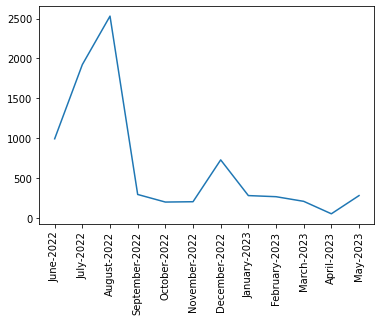

In [102]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()